## Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_score
import seaborn as sns


ModuleNotFoundError: No module named 'sklearn'

## Dataset

In [ ]:
#daftar dataset banjir jakarta 2015-2017
dataset1 = [
            "https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/b335b232-d54d-4ae3-b089-0e37c6c7f5ff/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2016.csv",
            "https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/5c8159de-db10-40e5-937b-f5f66ff5fb70/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2017.csv",
            
]

In [ ]:
#dataset referensi Januari 2015
df_ref1 = pd.read_csv("https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/31e34d71-d568-4f9c-8f55-c8cc2966f969/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2015.csv")

## Preprocessing Data

In [ ]:
#gabung ketiga dataset
for i in range(len(dataset1)):
  data = pd.read_csv(dataset1[i])
  df_ref1 = pd.concat([df_ref1, data])

df_ref1.reset_index(drop=True, inplace=True)
df_ref1.loc[12, "rata_rata_ketinggian_air"]= "10 - 80"
df_ref1.loc[17, "rata_rata_ketinggian_air"]= "5 - 90"


In [ ]:
#menghapus variabel yang tidak diperlukan
df1 = df_ref1.drop(["korban_meninggal",  "korban_hilang", "korban_luka_berat",  "korban_luka_ringan",  "jumlah_jiwa_pengungsi_tertinggi",  "jumlah_tempat_pengungsian", "jumlah_nilai_kerugian"], axis=1)

In [ ]:
#isi variabel kk terdampak yang kosong dengan rata-rata
df1.loc[23, "kk_terdampak"] = "0"
df1.loc[30, "kk_terdampak"] = "0"
df1.loc[31, "kk_terdampak"] = "0"
df1["kk_terdampak"] = df1["kk_terdampak"].astype("int64")

kk_terdampak_mean = df1["kk_terdampak"].mean()
df1.loc[23, "kk_terdampak"] = kk_terdampak_mean
df1.loc[30, "kk_terdampak"] = kk_terdampak_mean
df1.loc[31, "kk_terdampak"] = kk_terdampak_mean
df1["kk_terdampak"] = df1["kk_terdampak"].astype("int64")

In [ ]:
#isi variabel jiwa terdampak yang kosong dengan rata-rata
df1.loc[23, "jiwa_terdampak"] = "0"
df1.loc[30, "jiwa_terdampak"] = "0"
df1.loc[31, "jiwa_terdampak"] = "0"
df1.loc[32, "jiwa_terdampak"] = "0"
df1["jiwa_terdampak"] = df1["jiwa_terdampak"].astype("int64")

jiwa_terdampak_mean = df1["jiwa_terdampak"].mean()
df1.loc[23, "jiwa_terdampak"] = jiwa_terdampak_mean
df1.loc[30, "jiwa_terdampak"] = jiwa_terdampak_mean
df1.loc[31, "jiwa_terdampak"] = jiwa_terdampak_mean
df1.loc[32, "jiwa_terdampak"] = jiwa_terdampak_mean
df1["jiwa_terdampak"] = df1["jiwa_terdampak"].astype("int64")

print(df1.to_string())

    bulan  kecamatan  kelurahan rata_rata_ketinggian_air  lama_genangan  rw_terdampak  kk_terdampak  jiwa_terdampak
0       1         15         36                10 - 150               2           221          6095           13073
1       2         38        133                10 - 200               7           615         64458          231566
2       3         12         15                10 - 200               4            30          2869            8119
3       4          4          6                20 - 100               3            18          2235            7905
4       5          1          1                20 - 100               1             7           423            2088
5       6          0          0                        0              0             0             0               0
6       7          0          0                        0              0             0             0               0
7       8          0          0                        0              0 

In [ ]:
#isi data bulan 12 tahun 2016 
df1.loc[22.5] = 12, 0, 0, "0", 0, 0, 0, 0

#sort index
df1 = df1.sort_index().reset_index(drop=True)


In [ ]:
#mengurutkan bulan sehingga tidak terjadi perulangan angka dari 1-12 kembali
for i in range(1,37):
    df1.loc[i-1, "bulan"] = i
'''
bulan 1 = januari 2018
bulan 2 = februari 2018
bulan 3 = maret 2018
bulan 4 = april 2018
bulan 5 = mei 2018
.
.
.
.
.
bulan 32 = agustus 2020
bulan 33 = september 2020
bulan 34 = oktober 2020
bulan 35 = november 2020
bulan 36 = desember 2020
'''



'\nbulan 1 = januari 2018\nbulan 2 = februari 2018\nbulan 3 = maret 2018\nbulan 4 = april 2018\nbulan 5 = mei 2018\n.\n.\n.\n.\n.\nbulan 32 = agustus 2020\nbulan 33 = september 2020\nbulan 34 = oktober 2020\nbulan 35 = november 2020\nbulan 36 = desember 2020\n'

In [ ]:
#

df1["ketinggian_air_max"] = df1["rata_rata_ketinggian_air"].apply(lambda st: st[st.find("-")+1:]).astype("int64")
df1["ketinggian_air_min"] = df1["rata_rata_ketinggian_air"].apply(lambda st: st[:st.find("-")])
df1.loc[5, "ketinggian_air_min"] = "0"
df1.loc[6, "ketinggian_air_min"] = "0"
df1.loc[7, "ketinggian_air_min"] = "0"
df1.loc[8, "ketinggian_air_min"] = "0"
df1.loc[9, "ketinggian_air_min"] = "0"
df1.loc[23, "ketinggian_air_min"] = "0"

df1["ketinggian_air_min"] = df1["ketinggian_air_min"].astype("int64")


df1["ketinggian_air_avg"] = ((df1["ketinggian_air_min"]+df1["ketinggian_air_max"])/2)

df1_drop = df1.drop(["rata_rata_ketinggian_air","kelurahan", "ketinggian_air_max",  "ketinggian_air_min","rw_terdampak",  "kk_terdampak"], axis=1)
print(df1_drop.to_string())
df1_drop.info()

    bulan  kecamatan  lama_genangan  jiwa_terdampak  ketinggian_air_avg
0       1         15              2           13073                80.0
1       2         38              7          231566               105.0
2       3         12              4            8119               105.0
3       4          4              3            7905                60.0
4       5          1              1            2088                60.0
5       6          0              0               0                 0.0
6       7          0              0               0                 0.0
7       8          0              0               0                 0.0
8       9          0              0               0                 0.0
9      10          0              0               0                 0.0
10     11          7              4           13195               160.0
11     12         12              4            6192                35.0
12     13          8              2            3853             

## Analisis Data

In [ ]:
df1_drop.describe()

,bulan,kecamatan,lama_genangan,jiwa_terdampak,ketinggian_air_avg
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,10.944444,1.944444,17392.611111,67.013889
std,10.535654,9.089851,1.510808,39513.384832,46.100897
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,4.000000,1.000000,2120.250000,43.750000
50%,18.500000,11.000000,2.000000,7205.000000,60.000000
75%,27.250000,15.250000,2.000000,16054.000000,100.625000
max,36.000000,38.000000,7.000000,231566.000000,182.500000


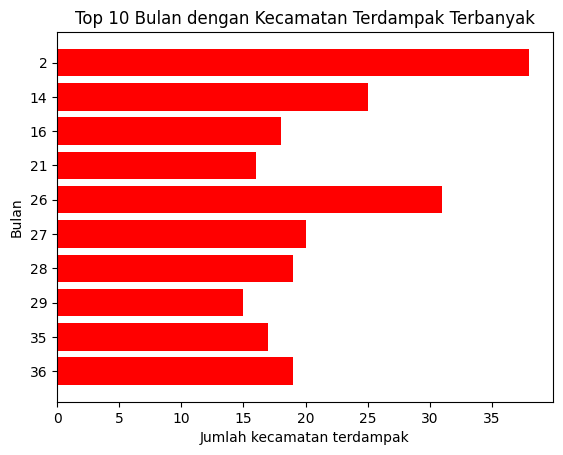

In [ ]:
df_sorted = df1_drop.sort_values(by="kecamatan", ascending=False)
top_10_kecamatan = df_sorted.head(10)
top_10_kecamatan_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_kecamatan_bulan = top_10_kecamatan_bulan.head(10)

plt.barh(top_10_kecamatan_bulan["bulan"].astype(str), top_10_kecamatan_bulan["kecamatan"], height=0.8,color=(1.0, 0.0, 0.0))
plt.title("Top 10 Bulan dengan Kecamatan Terdampak Terbanyak")
plt.xlabel("Jumlah kecamatan terdampak")
plt.ylabel("Bulan")
plt.show()

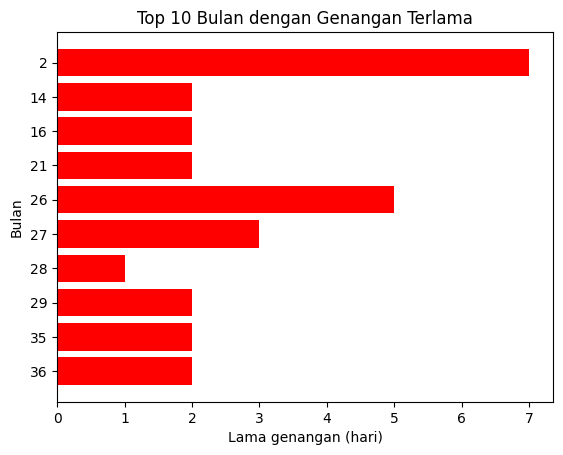

In [ ]:
df_sorted = df1_drop.sort_values(by="lama_genangan", ascending=False)
top_10_lama_genangan = df_sorted.head(10)
top_10_lama_genangan_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_lama_genangan_bulan = top_10_lama_genangan_bulan.head(10)

plt.barh(top_10_lama_genangan_bulan["bulan"].astype(str),top_10_lama_genangan_bulan["lama_genangan"], height=0.8, color=(1.0, 0, 0))
plt.title("Top 10 Bulan dengan Genangan Terlama")
plt.xlabel("Lama genangan (hari)")
plt.ylabel("Bulan")
plt.show()

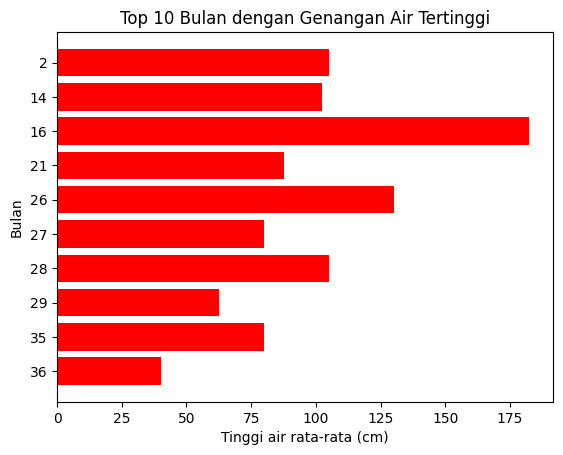

In [ ]:
df_sorted = df1_drop.sort_values(by="ketinggian_air_avg", ascending=False)
top_10_ketinggian_air_avg = df_sorted.head(10)
top_10_ketinggian_air_avg_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_ketinggian_air_avg_bulan = top_10_ketinggian_air_avg_bulan.head(10)

plt.barh(top_10_ketinggian_air_avg_bulan["bulan"].astype(str),top_10_ketinggian_air_avg_bulan["ketinggian_air_avg"], height=0.8, color=(1.0, 0, 0))
plt.title("Top 10 Bulan dengan Genangan Air Tertinggi")
plt.xlabel("Tinggi air rata-rata (cm)")
plt.ylabel("Bulan")
plt.show()

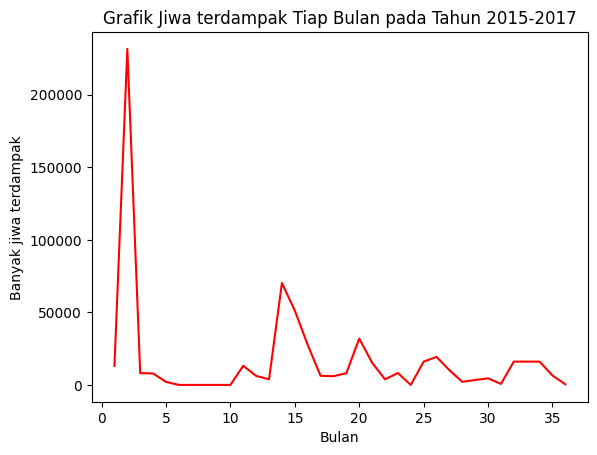

In [ ]:
plt.plot(df1["bulan"], df1["jiwa_terdampak"], color=(1.0, 0, 0))
plt.xlabel("Bulan")
plt.ylabel("Banyak jiwa terdampak")
plt.title("Grafik Jiwa terdampak Tiap Bulan pada Tahun 2015-2017")
plt.show()

<Axes: >

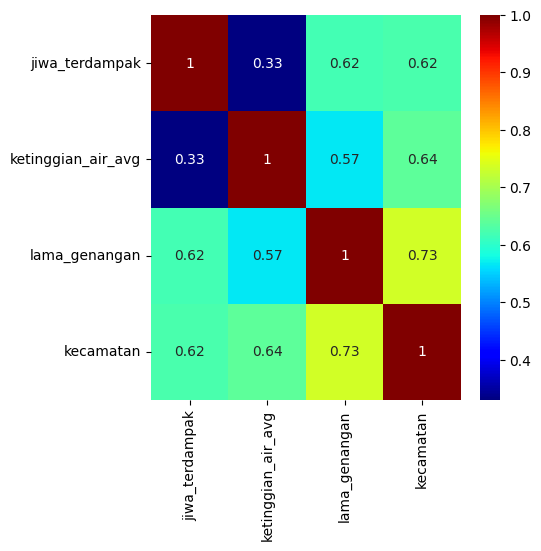

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df1_drop[["jiwa_terdampak","ketinggian_air_avg","lama_genangan","kecamatan"]].corr(), annot=True,  cmap="jet")

## Modeling Data

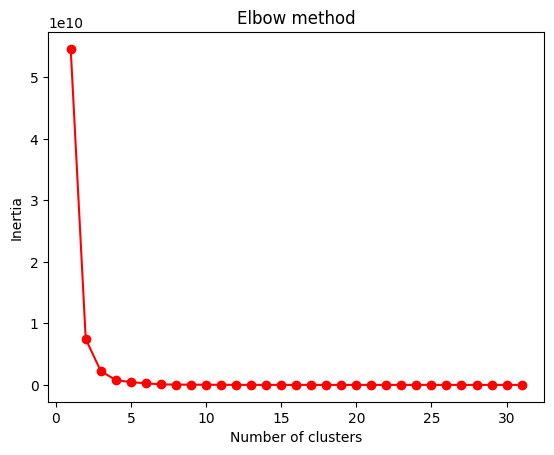

In [ ]:
data = df1_drop
inertias = []

for i in range(1,32):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,32), inertias, marker="o", color=(1.0, 0, 0))
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

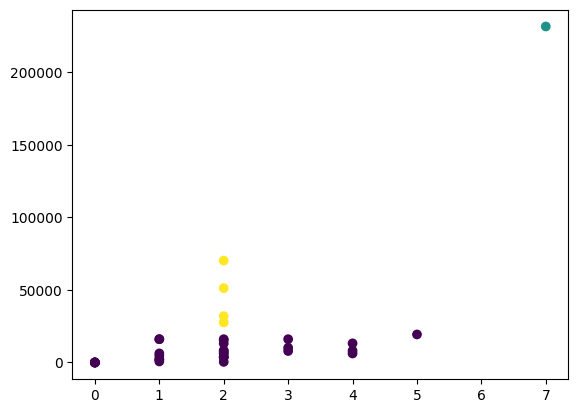

In [ ]:
random.seed(0)
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

plt.scatter(df1_drop["lama_genangan"],df1_drop["jiwa_terdampak"], c=kmeans.labels_)
plt.show()

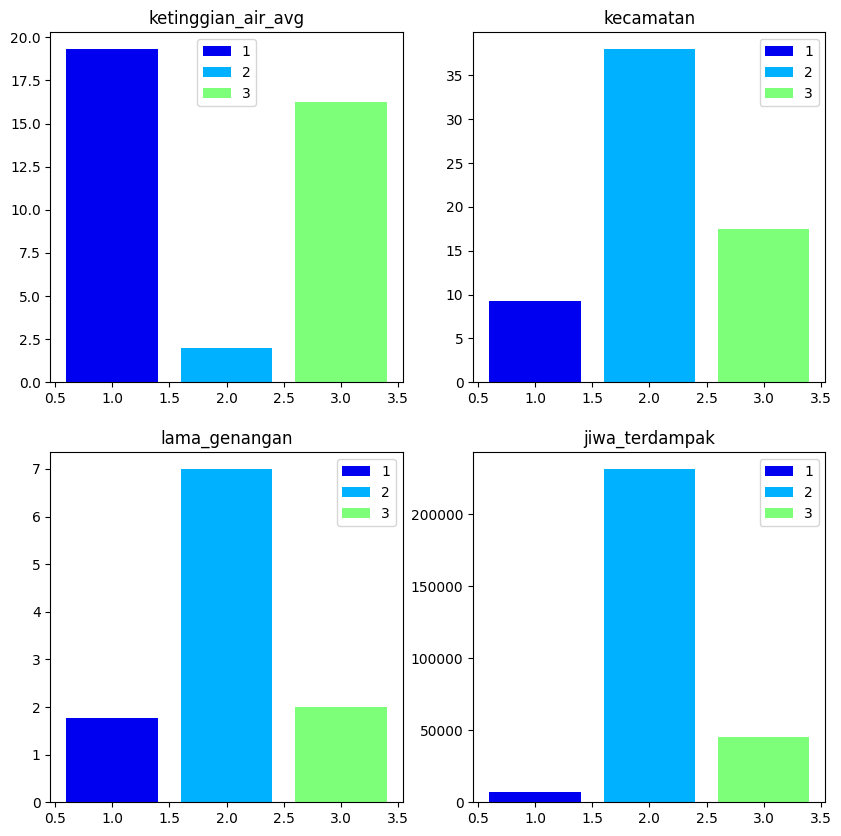

In [ ]:
x = df1_drop.columns
df1_drop["cluster"] = pd.Series(y_kmeans, index=df1_drop.index)


def kcluster(n):
    value = []
    for i in x:
        random.seed(0)
        value.append(df1_drop.loc[df1_drop["cluster"]==n,:].describe().loc["mean",i])
    return value


df1_drop.loc[df1_drop["cluster"] == 2, "cluster"] = 3
df1_drop.loc[df1_drop["cluster"] == 1, "cluster"] = 2
df1_drop.loc[df1_drop["cluster"] == 0, "cluster"] = 1

cl1 = kcluster(1)
cl2 = kcluster(2)
cl3 = kcluster(3)


plt.figure(figsize=(10,10))
label = ["ketinggian_air_avg", "kecamatan", "lama_genangan", "jiwa_terdampak"]
colors = plt.get_cmap("jet")


for i in range(1,5):
    random.seed(0)
    plt.subplot(2, 2, i)
    fig1 = plt.bar(1,cl1[i-1],color=colors(0.1))
    fig2 = plt.bar(2,cl2[i-1],color=colors(0.3))
    fig3 = plt.bar(3,cl3[i-1],color=colors(0.5))
    plt.title(label[i-1])
    plt.legend(["1","2","3","4"])

plt.show()

In [7]:
dist = df1_drop["cluster"].value_counts(normalize=True)
colors = plt.get_cmap("jet")

plt.figure(figsize=(5, 5))
plt.pie(dist, labels=dist.index, autopct="%1.1f%%", colors=[colors(0.1), colors(0.3), colors(0.5)])
plt.title("Pie Chart Distribusi Cluster") 
plt.show()

NameError: name 'df1_drop' is not defined

In [ ]:
silhouette_score = silhouette_score(df1_drop, y_kmeans)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.7253941224796568
